In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import xarray as xr

from scipy.interpolate import griddata

2023-06-13 07:31:02.392638: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

In [3]:
with open('../../../../in_situ_obs_ascat_with_customisations.pickle', 'rb') as handle: 
    ascat_dict = pickle.load(handle)    

In [15]:
station_lon = ascat_dict['Pioneer_8']['lon'][0]
station_lat = ascat_dict['Pioneer_8']['lat'][0]

## Example #1 Pioneer_8

In [5]:
ascat_dict['Pioneer_8']['nc_files']

{'ASCA_SZR_1B_M01_20180329145700Z_20180329163558Z_N_O_20180329160627Z': 'ASCATL1SZR_20180329T145700Z_20180329T163558Z_epct_4695022c_P.nc',
 'ASCA_SZR_1B_M02_20180329140000Z_20180329153858Z_N_O_20180329153840Z': 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc',
 'ASCA_SZR_1B_M01_20180328234200Z_20180329012358Z_N_O_20180329005813Z': 'ASCATL1SZR_20180328T234200Z_20180329T012358Z_epct_37fd0cf9_P.nc',
 'ASCA_SZR_1B_M02_20180328004800Z_20180328022958Z_N_O_20180328022916Z': 'ASCATL1SZR_20180328T004800Z_20180328T022958Z_epct_e2f37719_P.nc',
 'ASCA_SZR_1B_M01_20180327135700Z_20180327153858Z_N_O_20180327150603Z': 'ASCATL1SZR_20180327T135700Z_20180327T153858Z_epct_24ff3439_P.nc',
 'ASCA_SZR_1B_M02_20180326150000Z_20180326164158Z_N_O_20180326163958Z': 'ASCATL1SZR_20180326T150000Z_20180326T164158Z_epct_b7d01466_P.nc',
 'ASCA_SZR_1B_M01_20180326004500Z_20180326022958Z_N_O_20180326015135Z': 'ASCATL1SZR_20180326T004500Z_20180326T022958Z_epct_ab0bb9e7_P.nc',
 'ASCA_SZR_1B_M02_201803252

In [10]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
ascat_fn = 'ASCATL1SZR_20180329T140000Z_20180329T153858Z_epct_3e2792a6_P.nc'
data_ascat = xr.open_dataset(data_dir + ascat_fn)

In [11]:
data_ascat

<xarray.Dataset>
Dimensions:              (lat: 599, lon: 1211)
Coordinates:
  * lat                  (lat) float64 89.09 88.8 88.5 ... -88.14 -88.43 -88.73
  * lon                  (lon) float64 -179.8 -179.5 -179.2 ... 179.7 180.0
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 ...
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T140000Z
    stop_sensing_time:         20180329T153858.125000Z
    EPCT_geospatial_lat_max:   76.4227
    EPCT_geospatial_lat_min:   62.1737
    EPCT_geospatial_lon_max:   326.5298
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [ ]:
df.replace(-2147.48364258, np.NaN)

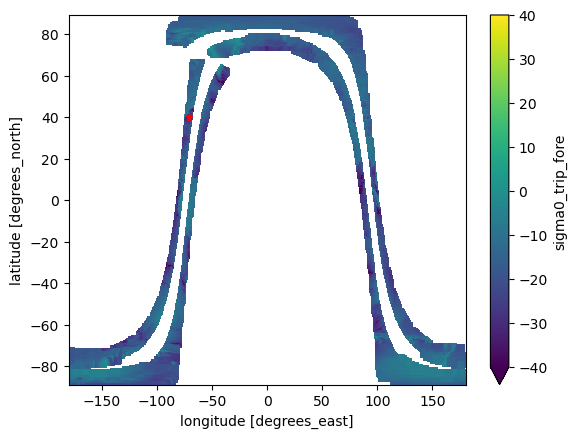

In [28]:
data_ascat['sigma0_trip_fore'].plot(vmax=40, vmin=-40)
plt.plot(-70.8, 40.1, 'r*', markersize=5)

In [22]:
station_lat

40.1334

In [23]:
station_lon

-70.7785

In [52]:
subset_ascat_station = data_ascat.sel(lat=station_lat, lon=station_lon, method='nearest')

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [54]:
data_ascat.where((data_ascat.lon==subset_ascat_station.lon.values) & (data_ascat.lat==subset_ascat_station.lat.values), drop=True)

<xarray.Dataset>
Dimensions:              (lat: 1, lon: 1)
Coordinates:
  * lat                  (lat) float64 40.03
  * lon                  (lon) float64 -70.68
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 54.51
    azi_angle_trip_mid   (lat, lon) float32 100.1
    azi_angle_trip_aft   (lat, lon) float32 145.6
    f_f_fore             (lat, lon) float32 0.0
    f_f_mid              (lat, lon) float32 0.0
    f_f_aft              (lat, lon) float32 0.0
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 76.0
    sigma0_trip_fore     (lat, lon) float32 -28.43
    sigma0_trip_mid      (lat, lon) float32 -22.44
    sigma0_trip_aft      (lat, lon) float32 -26.51
    swath_indicator      (lat, lon) float32 1.0
    crs                  (lon, lat) object b''
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T140000Z
    stop_sensing_time:         20180329T153858.125000Z
    EPCT_geospatial_lat_max:   76.4227
    EPCT_geospatial_lat_min:   62.1737
    EPCT_geospatial_lon_max:   326.5298
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [77]:
lon_i, lat_i = np.nonzero(xr.where((data_ascat.lon==subset_ascat_station.lon.values) & (data_ascat.lat==subset_ascat_station.lat.values), 1, 0).data)

In [117]:
dx2=8
dy2=8

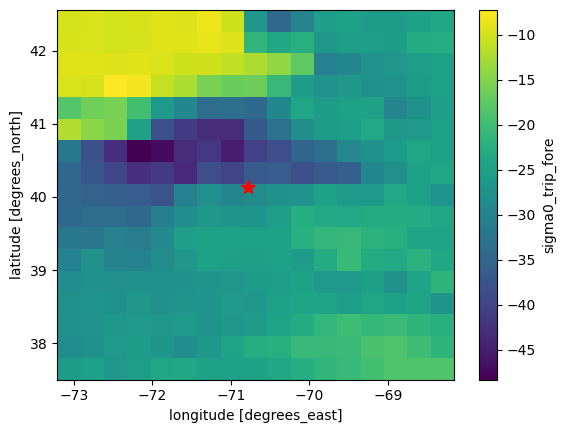

In [119]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-dx2, lat_i[0]+dx2+1), lon=slice(lon_i[0]-dx2, lon_i[0]+dx2+1))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_fore.plot()
plt.plot(station_lon, station_lat, 'r*', markersize=10)

In [121]:
cropped_image['lat'].values

array([42.40790007, 42.11053368, 41.81316728, 41.51580088, 41.21843449,
       40.92106809, 40.62370169, 40.3263353 , 40.0289689 , 39.7316025 ,
       39.4342361 , 39.13686971, 38.83950331, 38.54213691, 38.24477052,
       37.94740412, 37.65003772])

In [107]:
cropped_image['sigma0_trip_fore'].values.shape

(17, 17)

## Missings are not in the same location for different parameters 

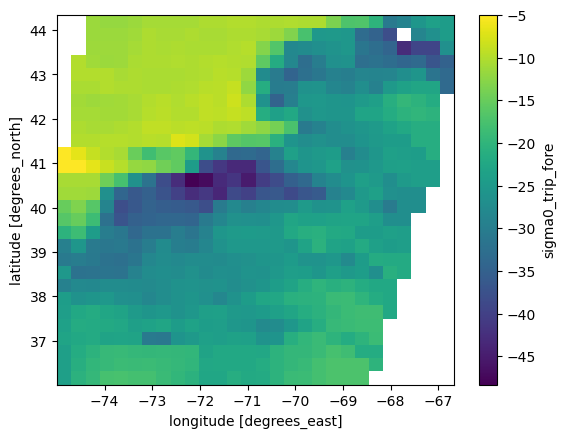

In [105]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-14, lat_i[0]+14), lon=slice(lon_i[0]-14, lon_i[0]+14))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_fore.plot()

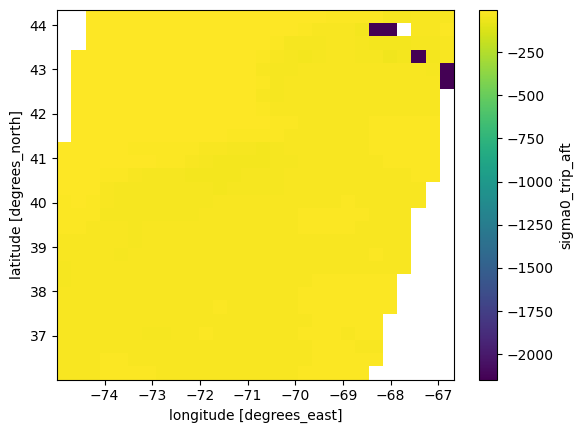

In [104]:
cropped_image = data_ascat.isel(lat=slice(lat_i[0]-14, lat_i[0]+14), lon=slice(lon_i[0]-14, lon_i[0]+14))
cropped_image.where(cropped_image['sigma0_trip_fore'] > -2000).sigma0_trip_aft.plot()

In [66]:
data_ascat.sigma0_trip_aft[0,0]

<xarray.DataArray 'sigma0_trip_aft' ()>
array(nan)
Coordinates:
    lat      float64 89.09
    lon      float64 -179.8
Attributes:
    long_name:     sigma0_trip_aft
    grid_mapping:  crs
    short_name:    sigma0_trip_aft
    comment:       sigma0_trip_aft

In [70]:
data_ascat.isel(lat=slice(0,5), lon=slice(0,4))

<xarray.Dataset>
Dimensions:              (lat: 5, lon: 4)
Coordinates:
  * lat                  (lat) float64 89.09 88.8 88.5 88.2 87.9
  * lon                  (lon) float64 -179.8 -179.5 -179.2 -178.9
Data variables: (12/44)
    azi_angle_trip_fore  (lat, lon) float32 ...
    azi_angle_trip_mid   (lat, lon) float32 ...
    azi_angle_trip_aft   (lat, lon) float32 ...
    f_f_fore             (lat, lon) float32 ...
    f_f_mid              (lat, lon) float32 ...
    f_f_aft              (lat, lon) float32 ...
    ...                   ...
    num_val_trip_aft     (lat, lon) float32 ...
    sigma0_trip_fore     (lat, lon) float32 ...
    sigma0_trip_mid      (lat, lon) float32 ...
    sigma0_trip_aft      (lat, lon) float32 ...
    swath_indicator      (lat, lon) float32 ...
    crs                  |S1 b''
Attributes: (12/34)
    Conventions:               CF-1.5
    start_sensing_time:        20180329T140000Z
    stop_sensing_time:         20180329T153858.125000Z
    EPCT_geospatial_lat_max:   76.4227
    EPCT_geospatial_lat_min:   62.1737
    EPCT_geospatial_lon_max:   326.5298
    ...                        ...
    EPCT_roi:                  null
    EPCT_sensing_start:        null
    EPCT_sensing_stop:         null
    EPCT_software_ version:    3.1.0
    EPCT_software_name:        DataTailor
    EPCT_stretch_method:       null

In [60]:
data_ascat[lat_i[0], lon_i[0]]

KeyError: (367, 165)